#Mount drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/yolodetection/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/yolodetection


#Manage Imports

In [0]:
import cv2
import numpy as np

#Load weight, config, classes, layername, colors

In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

#Load image

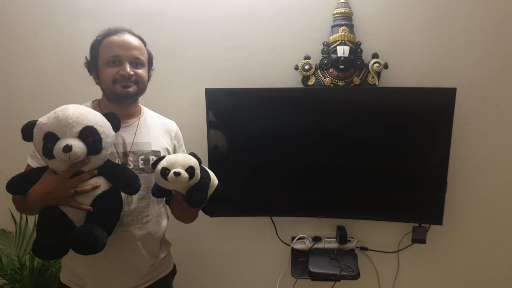

In [6]:
# Loading image
from google.colab.patches import cv2_imshow
img = cv2.imread("myimage2.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
cv2_imshow(img)

#Resize image to medium size and pass it on to network
First image needs to be converted to blob

In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

Among all obtained outputs, take detections with classification threshold above 0.5, extract, x,y,h,w and append confidence and classid for it.

In [0]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
#Run over all outputs
for out in outs:
  #Run over all (4+1+N_Classes)
    for detection in out:
        scores = detection[5:]
        #Getting class with maximum score only in given detection
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            # Object detected
            #for scaling center_x, center_y, w, h
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

#Erasing few overlapping boxes based on nms criteria

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.4)

#Lets display result

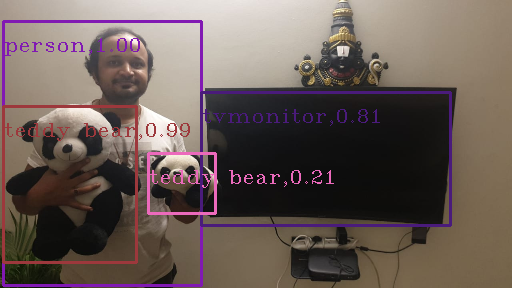

In [0]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])+","+ str(format(confidences[i],'.2f'))
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 1, color, 1)
cv2_imshow(img)